Best objective: [28.7680151]
Best solution: [ 2.76545237  7.80191759  4.53102435 11.57016904  8.34406133 14.24538676
 10.21650511 15.18331352 16.40865408 17.85238549]


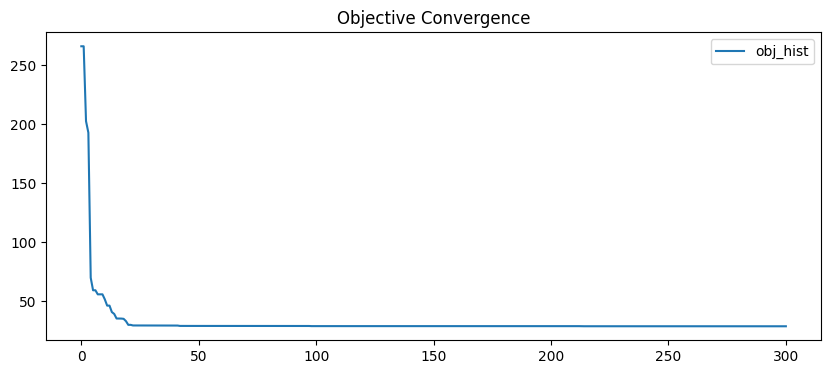

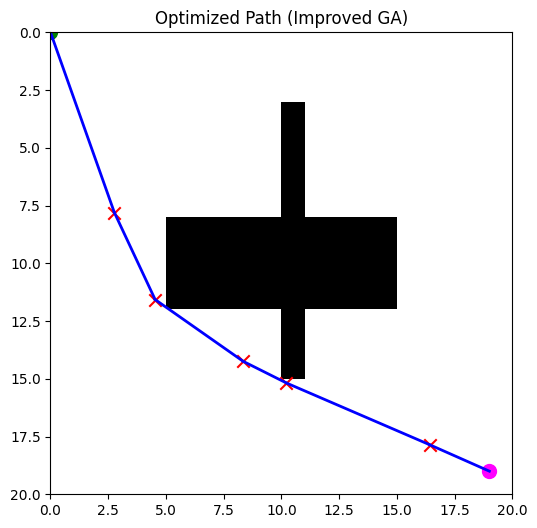

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple


GRID_SIZE = 20
start = np.array([0, 0])
goal = np.array([19, 19])

grid = np.zeros((GRID_SIZE, GRID_SIZE))
grid[8:12, 5:15] = 1
grid[3:15, 10] = 1


def collision(p1, p2):
    num_samples = 100
    collision_count = 0

    for t in np.linspace(0, 1, num_samples):
        point = p1 + t * (p2 - p1)
        x, y = int(round(point[0])), int(round(point[1]))

        if x < 0 or x >= GRID_SIZE or y < 0 or y >= GRID_SIZE:
            collision_count += 1
        elif grid[y, x] == 1:
            collision_count += 1

    return collision_count / num_samples


N_waypoints = 5


def objective(x: List):

    waypoints = np.array(x).reshape(-1, 2)
    path = [start] + list(waypoints) + [goal]

    length = 0
    penalty = 0

    for i in range(len(path) - 1):
        length += np.linalg.norm(path[i + 1] - path[i])
        penalty += 1000 * collision(path[i], path[i + 1])

    return length + penalty


x_min = np.zeros(2 * N_waypoints)
x_max = np.ones(2 * N_waypoints) * (GRID_SIZE - 1)

# =====================================================
# Run
# =====================================================

GA_test = GeneticAlgorithm(
    objective_function=objective,
    upperbound=x_max,
    lowerbound=x_min,
    population_size=80,
    generation_size=300,
    mutation_sigma=1.5,
)

df_obj, df_sol = GA_test.run()

print("Best objective:", df_obj.iloc[-1].values)
print("Best solution:", df_sol.iloc[-1].values)

df_obj.plot(figsize=(10,4))
plt.title("Objective Convergence")
plt.show()


# =====================================================
# Visualize
# =====================================================

best_waypoints = df_sol.iloc[-1].values.reshape(-1, 2)
path = np.vstack([start, best_waypoints, goal])

plt.figure(figsize=(6,6))

for y in range(GRID_SIZE):
    for x in range(GRID_SIZE):
        if grid[y, x] == 1:
            plt.fill([x, x+1, x+1, x], [y, y, y+1, y+1], 'k')

for i in range(len(path)-1):
    plt.plot(
        np.linspace(path[i][0], path[i+1][0], 100),
        np.linspace(path[i][1], path[i+1][1], 100),
        'b',
        linewidth=2,
    )

plt.scatter(path[1:-1,0], path[1:-1,1], c='red', marker='x', s=80)
plt.scatter(start[0], start[1], c='green', s=100)
plt.scatter(goal[0], goal[1], c='magenta', s=100)

plt.xlim(0, GRID_SIZE)
plt.ylim(0, GRID_SIZE)
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.title("Optimized Path (Improved GA)")
plt.show()